# Part 1(classification)
#### Name: YAGIZ SEZERSAN


#### a. Load the python library

In [54]:
# Necessary libraries for Lab4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#### b. Read the data

In [55]:
# Import csv file
df = pd.read_csv("user_behavior.csv")

# Display the first few rows of dataset
df.head()

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,7.010387,0.419355,31.0,13040,default,1,1,13,E,1
1,51.419393,0.252336,107.0,330113,default,1,1,27,E,1
2,25.860775,0.275000,40.0,62066,default,1,1,11,E,1
3,0.205909,0.818182,11.0,136,default,1,1,9,E,1
4,0.122125,0.812500,16.0,118,default,1,1,13,E,1


In [56]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36117 entries, 0 to 36116
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  36117 non-null  float64
 1   api_access_uniqueness           36117 non-null  float64
 2   sequence_length(count)          36117 non-null  float64
 3   vsession_duration(min)          36117 non-null  int64  
 4   ip_type                         36117 non-null  object 
 5   num_sessions                    36117 non-null  int64  
 6   num_users                       36117 non-null  int64  
 7   num_unique_apis                 36117 non-null  int64  
 8   source                          36117 non-null  object 
 9   classification                  36117 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ MB


#### c. Drop the unneeded data

In [57]:
# First we need to see how many null values we have
df.isnull().sum().sum()

0

In [58]:
# Check unique values for object and target columns
print(df.ip_type.value_counts())
print()

print(df.source.value_counts())
print()

print(df.classification.value_counts())

default       34441
private_ip     1384
datacenter      291
google_bot        1
Name: ip_type, dtype: int64

E    19283
F    16834
Name: source, dtype: int64

1    24734
0    10052
2     1309
3       22
Name: classification, dtype: int64


In [59]:
# google_bot has only one value so drop it
df = df[df.ip_type != "google_bot"]

In [60]:
# Now only 3 unique values
print(df.ip_type.value_counts())

default       34441
private_ip     1384
datacenter      291
Name: ip_type, dtype: int64


#### d. Create dummy values for the dataframe

In [61]:
# Create dummy variables
df1 = pd.get_dummies(df, drop_first=True)

In [62]:
# Now all columns are numerical
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36116 entries, 0 to 36116
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  36116 non-null  float64
 1   api_access_uniqueness           36116 non-null  float64
 2   sequence_length(count)          36116 non-null  float64
 3   vsession_duration(min)          36116 non-null  int64  
 4   num_sessions                    36116 non-null  int64  
 5   num_users                       36116 non-null  int64  
 6   num_unique_apis                 36116 non-null  int64  
 7   classification                  36116 non-null  int64  
 8   ip_type_default                 36116 non-null  uint8  
 9   ip_type_private_ip              36116 non-null  uint8  
 10  source_F                        36116 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 2.6 MB


In [63]:
# Save cleaned dataset
df1.to_csv("user_behavior_cleaned.csv", index=False)

####  e. Prepare the features and target variable

In [64]:
# Assign features and target
X = df1.drop(["classification"],axis = 1)
y = df1["classification"]

# Split data as test an training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

####  f. Create a pipeline

In [65]:
# Generate pipeline with related classifier models
names = ["LogisticRegression", "KNeighborsClassifier", "LinearSVC", " SVM_RBF","DecisionTree", "NaiveBayes",
        "Random forest Classifier","AdaBoost Classifier"," XGBoost Classifier"," CatBoost Classifier"]

scores = []
r2 = []
rmse = []

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    LinearSVC(C= 1),
    SVC(kernel='rbf',C= 1),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100),
    CatBoostClassifier(iterations=100)
]
# Choose Robust scaler and SelectFromModel >> RandomForestClassifier
for classifier in classifiers:
    pipeline = Pipeline([
        ("scaler",RobustScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=50))),
        ("classifier",classifier),
    ])
    pipeline.fit(X_train, y_train)
    Y_pred = pipeline.predict(X_test)
    r2.append(pipeline.score(X_test, y_test))
    rmse.append(mean_squared_error(y_test, Y_pred, squared=False))
    print(classifier)
    scores.append(pipeline.score(X_test, y_test))
    print("Model score: %.3f "%pipeline.score(X_test, y_test))
    print("\n---------------------------\n")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Model score: 0.965 

---------------------------

KNeighborsClassifier(n_neighbors=3)
Model score: 0.985 

---------------------------



C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)
Model score: 0.962 

---------------------------

SVC(C=1)
Model score: 0.845 

---------------------------

DecisionTreeClassifier()
Model score: 0.972 

---------------------------

GaussianNB()
Model score: 0.734 

---------------------------

RandomForestClassifier()
Model score: 0.972 

---------------------------

AdaBoostClassifier(n_estimators=100)
Model score: 0.963 

---------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_

In [67]:
# Generate table for easy view of scores
scores_df = pd.DataFrame(zip(names,r2, rmse), columns=['Classifier', 'Accuracy', 'RMSE_Score'])
scores_df.sort_values(by=['Accuracy', 'RMSE_Score'], ascending=[False,True])

,Classifier,Accuracy,RMSE_Score
1,KNeighborsClassifier,0.984605,0.150681
9,CatBoost Classifier,0.972976,0.265613
8,XGBoost Classifier,0.972644,0.268104
6,Random forest Classifier,0.971979,0.272407
4,DecisionTree,0.971758,0.274028
0,LogisticRegression,0.965002,0.320074
7,AdaBoost Classifier,0.963119,0.331631
2,LinearSVC,0.961679,0.334292
3,SVM_RBF,0.844501,0.438990
5,NaiveBayes,0.734411,1.160409


####  g. Select the best pipe

In [68]:
# Apply again same steps with best pipe which is KNeighborsClassifier
bestPipe = Pipeline([
        ("scaler",RobustScaler()),
        ('feature_selection', SelectFromModel( LogisticRegression())),
        ("classifier",KNeighborsClassifier(3)),
    ])
bestPipe.fit(X_train, y_train)
Y_pred = bestPipe.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[2488    0    6    0]
 [   0 6202    0    0]
 [  24  113  193    0]
 [   0    3    0    0]]

Confusion Matrix HeatMap:


<Axes: xlabel='Predicted', ylabel='Actual'>

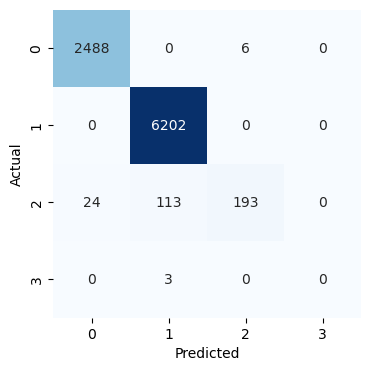

In [69]:
# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, Y_pred)
print(cm)

print("\nConfusion Matrix HeatMap:")
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, cbar=False, square=True, cmap="Blues",vmax = 6000,fmt="d")

In [70]:
# Classification report and precision/recall
print("\nClassification Report:")
print(classification_report(y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2494
           1       0.98      1.00      0.99      6202
           2       0.97      0.58      0.73       330
           3       0.00      0.00      0.00         3

    accuracy                           0.98      9029
   macro avg       0.74      0.65      0.68      9029
weighted avg       0.98      0.98      0.98      9029



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
